In [14]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('german.csv')
df.head()

,checking_account,duration_months,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment,Installment_rate,Sex,other_debtors,...,Property,Age,Other_installment_plans,Housing,No_credits_inthis_bank,Job,NO_people_provide_maintainace,Telephone,foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [16]:
categorical_attributes = [ "checking_account",
    "Credit_history", 
    "Savings_account", 
    "Present_employment", 
    "Property",
    "Purpose",
    "Sex",
    "other_debtors",
    "Other_installment_plans",
    "Housing",
    "Job",
    "Telephone",
    "foreign_worker"
]

ordinal_encoding = [
    "checking_account",
    "Credit_history", 
    "Savings_account", 
    "Present_employment", 
    "Property"
]

onehot_encoding = [
    "Purpose",
    "Sex",
    "other_debtors",
    "Other_installment_plans",
    "Housing",
    "Job",
    "Telephone",
    "foreign_worker"
]
numerical_attirbutes = ['duration_months', 'Credit_amount','Installment_rate','Present_residence_since','Age','No_credits_inthis_bank','NO_people_provide_maintainace']


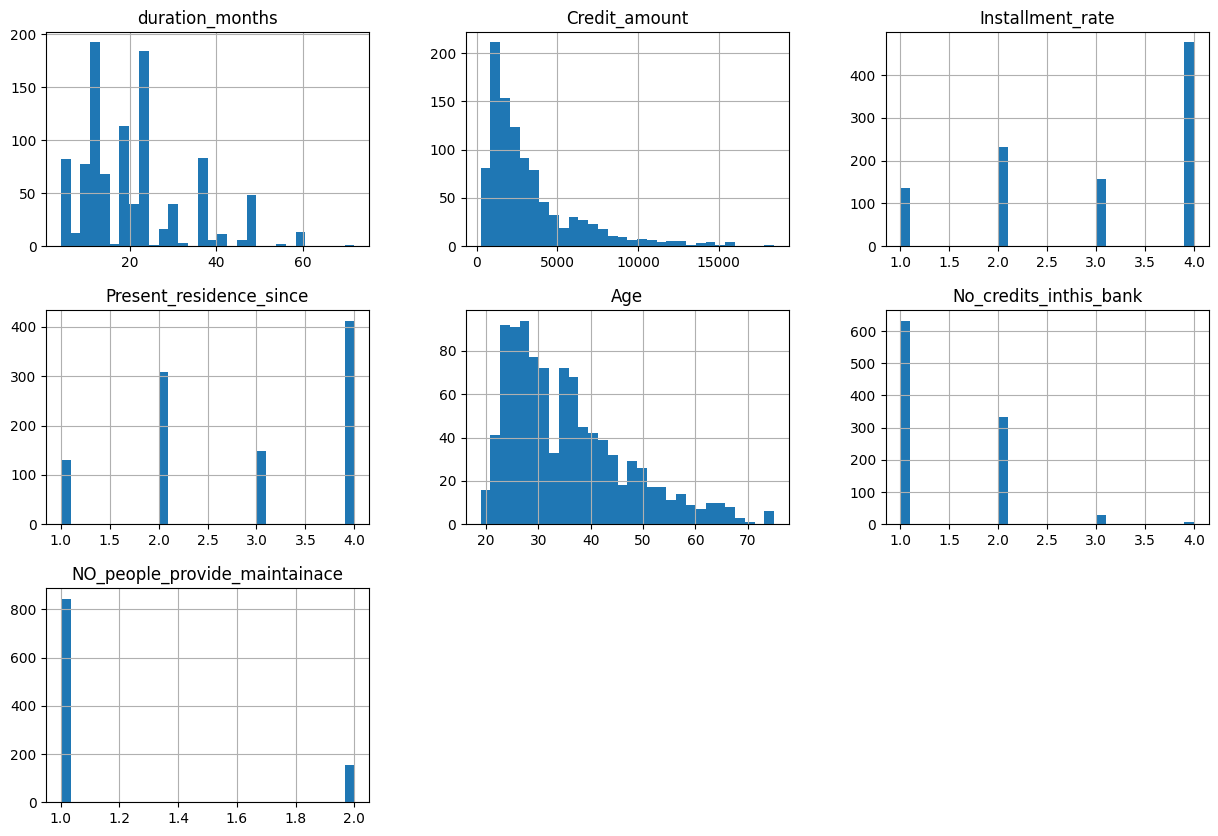

In [17]:
df[numerical_attirbutes].hist(bins=30, figsize=(15, 10))
plt.show()

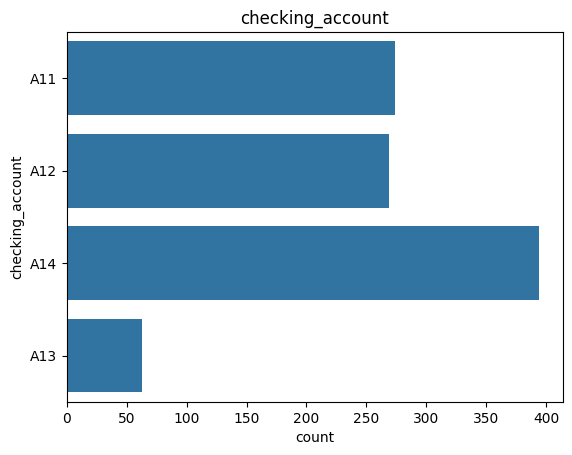

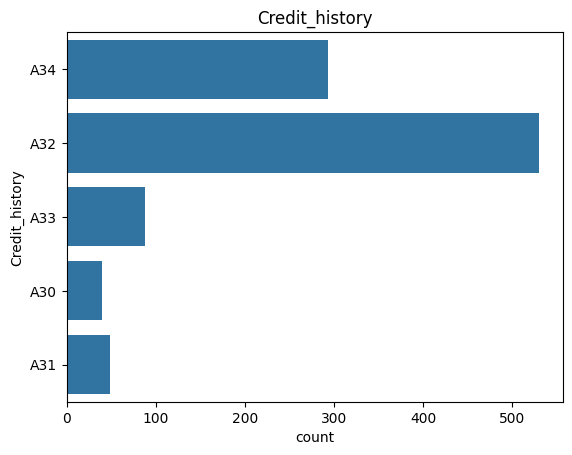

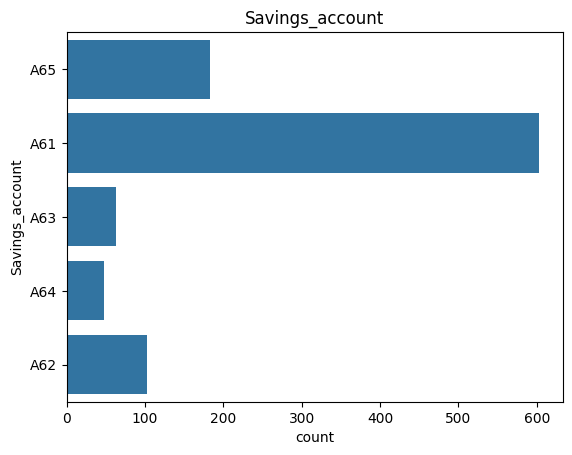

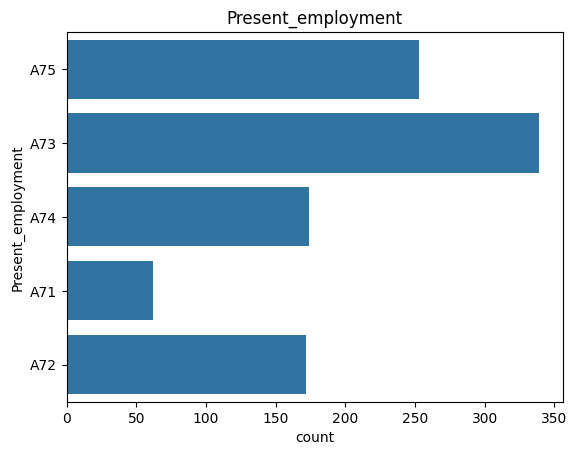

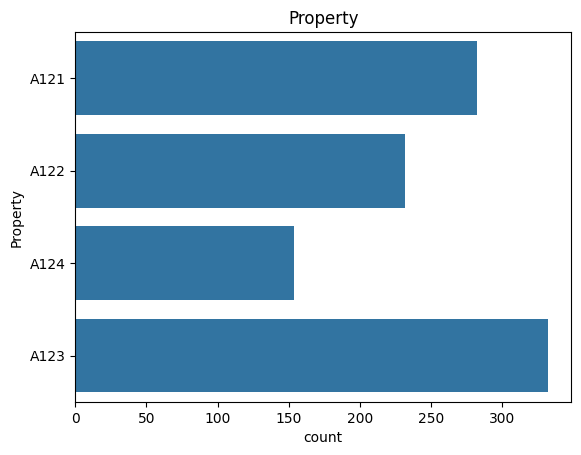

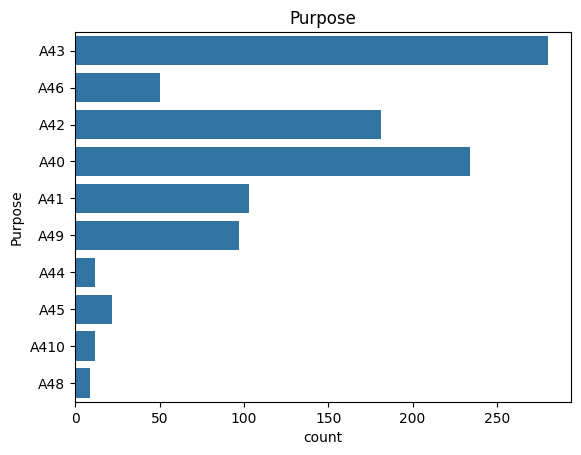

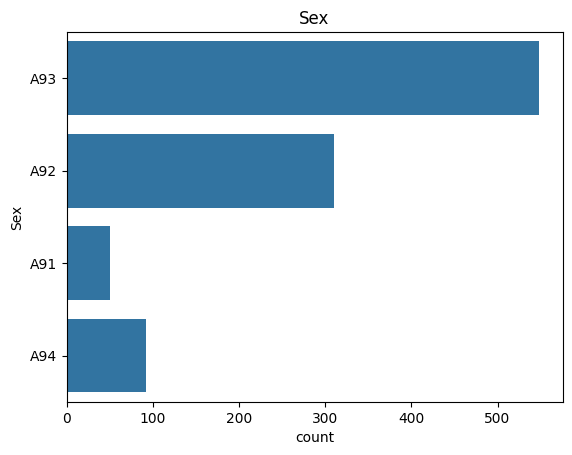

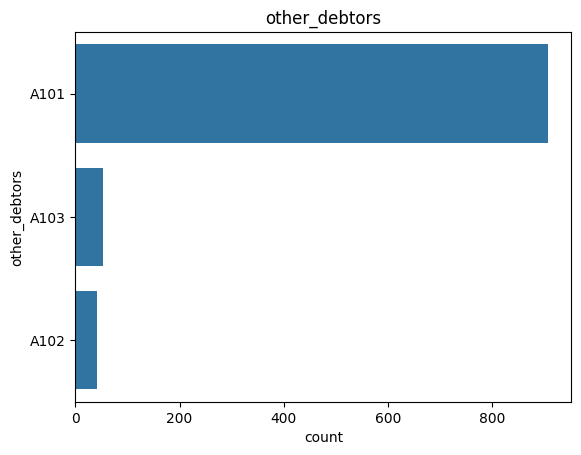

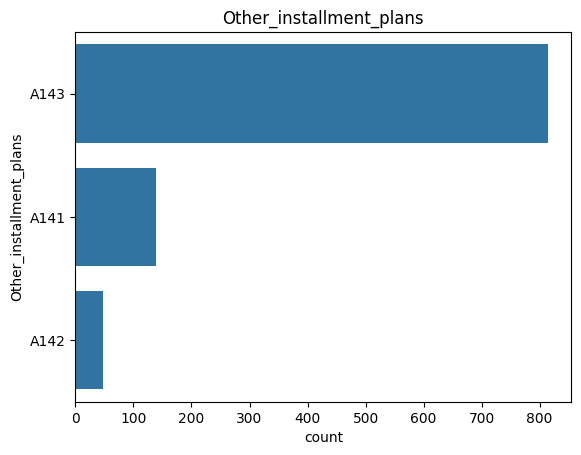

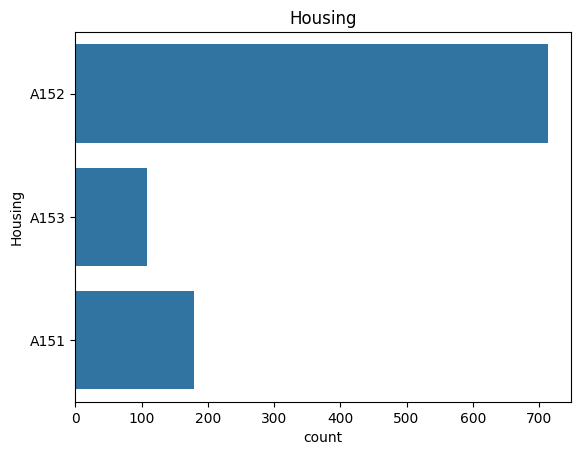

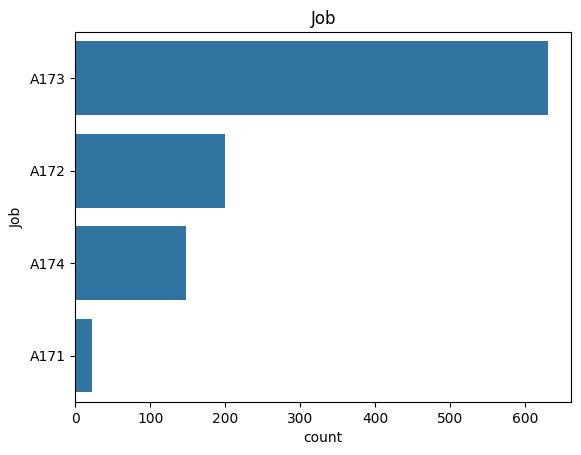

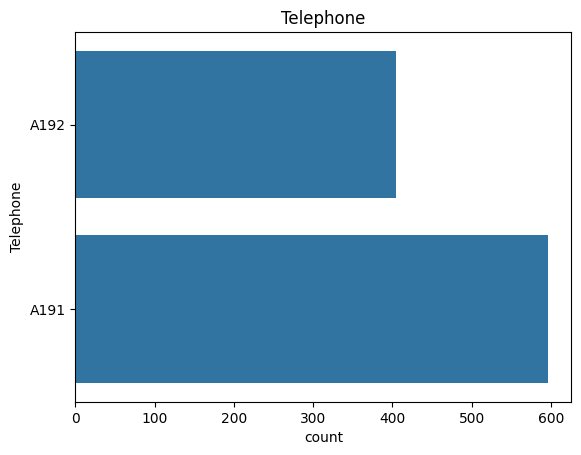

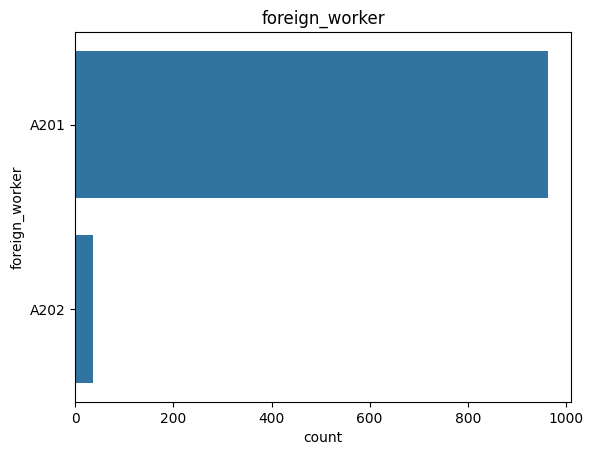

In [19]:
for attr in categorical_attributes:
    sns.countplot(df[attr])
    plt.title(attr)
    plt.show()

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
trans=ColumnTransformer(
    transformers=[
        ('tnf1',OrdinalEncoder(categories=[
    ["A14", "A11", "A12", "A13"],  # Status of existing checking account
    ["A34", "A33", "A32", "A31", "A30"],  # Credit history
    ["A65", "A61", "A62", "A63", "A64"],  # Savings account/bonds
    ["A71", "A72", "A73", "A74", "A75"],  # Present employment since
    ["A124", "A123", "A122", "A121"]  # Property
]),ordinal_encoding),
('tnf2',OneHotEncoder(drop='first'),onehot_encoding)
    ],remainder='passthrough'
)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", trans),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X = df.drop("Credit_risk", axis=1) 
y = df["Credit_risk"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
print(f"Training Accuracy: {pipeline.score(X_train, y_train)}")
print(f"Testing Accuracy: {pipeline.score(X_test, y_test)}")


Training Accuracy: 1.0
Testing Accuracy: 0.765


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
print(f"Test Accuracy: {best_model.score(X_test, y_test)}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Score: 0.7612500000000001
Test Accuracy: 0.765


0.76
